In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

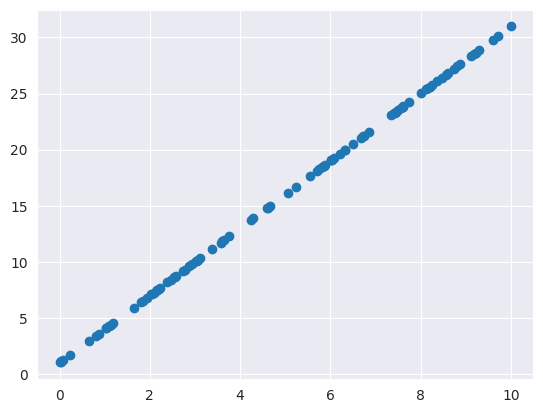

In [15]:
#Data Generate X , Y
m=100
X=np.random.rand(m)*10
noise=np.random.randn(m)
y=3*X+1
plt.scatter(X,y)
plt.show()

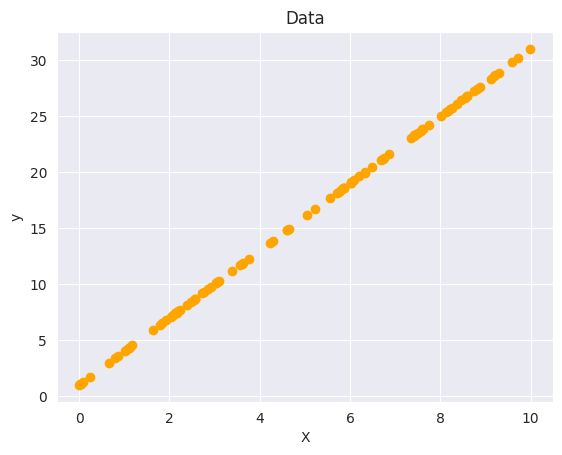

In [16]:
def plotData(X ,y ,colour="orange", title="Data"):
    plt.scatter(X,y,c=colour)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

plotData(X,y)

In [17]:
def normaliseData(X):
   X=(X-X.mean())/X.std()
   return X

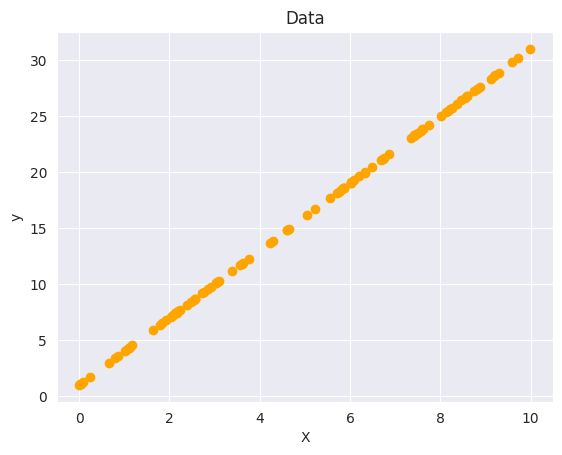

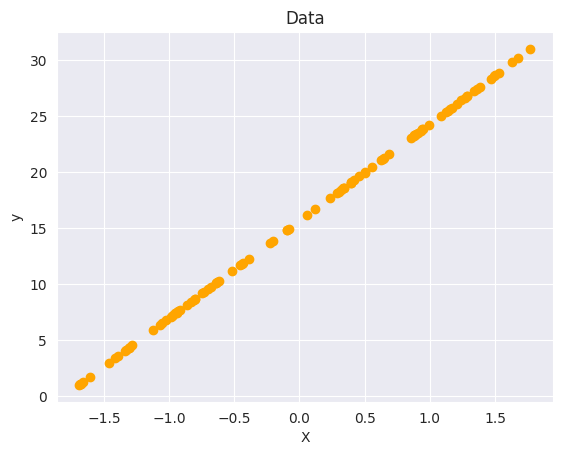

In [18]:
plotData(X,y)
X=normaliseData(X)
plotData(X,y)

In [19]:
#Train test Splits
def trainTestSplit(X,y,split=0.8):
    m=X.shape[0]
    data = np.zeros((m,2))
    data[:,0]=X
    data[:,1]=y
    np.random.shuffle(data)

    split=int(m*split)
    XT=data[:split,0]
    yT=data[:split,1]

    XTe=data[split:,0]
    yTe=data[split:,1]

    return XT,yT,XTe,yTe

(80,) (80,) (20,) (20,)


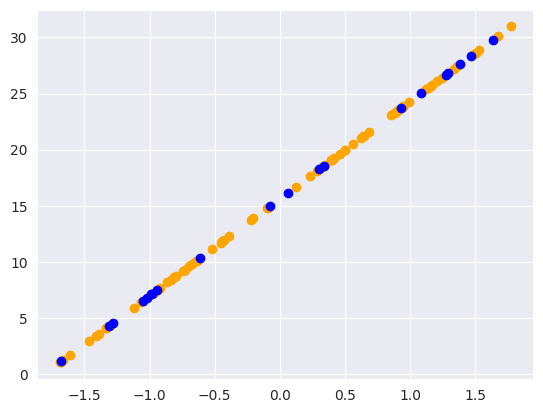

In [20]:
XT,yT,XTe,yTe=trainTestSplit(X,y)
print(XT.shape,yT.shape,XTe.shape,yTe.shape)
plt.scatter(XT,yT,c="orange")
plt.scatter(XTe,yTe,c="blue")
plt.show()

In [21]:
#Hypothesis function
def hypothesis(X,theta):
    return theta[0] + X*theta[1]

def error(X,y,theta):
  m=X.shape[0]
  e=0
  for i in range(m):
    y_i=hypothesis(X[i],theta)
    e=e+(y[i] - y_i)**2
  return e/(2*m)

def gradient(X,y,theta):
  m=X.shape[0]
  grad=np.zeros((2,))

  for i in range(m):
    exp=hypothesis(X[i],theta) -y[i]
    grad[0]+= (exp)
    grad[1]+=(exp)*X[i]

  return grad/m


def train(X,y,lr=0.1):

  theta =np.zeros((2,))

  maxItrs=100

  error_list=[]


  for i in range(maxItrs):

   grad=gradient(X,y,theta)

   error_list.append(error(X,y,theta))

   theta[0]=theta[0]-lr*grad[0]
   theta[1]=theta[1]-lr*grad[1]


  plt.plot(error_list)


  return theta




[15.64179064  8.65991002]


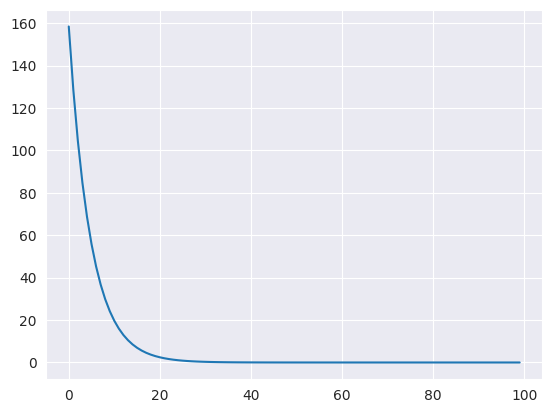

In [22]:
theta=train(XT,yT)
print(theta)

In [23]:
def predict(X,theta):
  return hypothesis(X,theta)


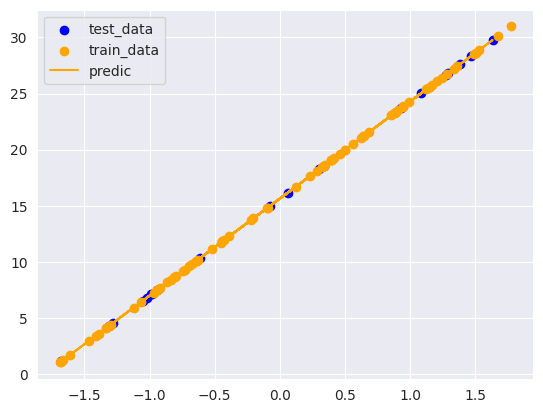

In [24]:
plt.scatter(XTe,yTe,c="blue" , label="test_data")
plt.scatter(XT,yT,c="orange", label="train_data")
yp=predict(XTe,theta)
plt.plot(XTe,yp,c="orange" , label="predic")
plt.legend()
plt.show()

In [25]:
#MOdel Evaluation

def r2Score(y,yp):
  ymean=np.mean(y)
  num=np.sum((y-yp)**2)
  den=np.sum((y-ymean)**2)
  return 1-(num/den)


In [26]:
r2Score(yTe,yp)


0.9999999963152008